In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import re

# 1-- Extracting both Images & Text

In [2]:
caption_df = pd.read_csv(r"C:\Users\prave\OneDrive\Desktop\Image_Captioning\captions.txt")

# EDA

In [3]:
caption_df.head(10) # Each image having 5 captions

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .


In [4]:
caption_df.shape #  8091*5--> 40455

(40455, 2)

In [5]:
caption_df.columns

Index(['image', 'caption'], dtype='object')

In [6]:
caption_df['image'].value_counts()

1000268201_693b08cb0e.jpg    5
3388094307_5a83be64a5.jpg    5
3393394134_0caac47e1c.jpg    5
3393343330_b13df4d8ec.jpg    5
3393152604_27bd1037f2.jpg    5
                            ..
2699733386_c346c87ea6.jpg    5
2699426519_228719b1db.jpg    5
2699342860_5288e203ea.jpg    5
2699125097_c6801d80ed.jpg    5
997722733_0cb5439472.jpg     5
Name: image, Length: 8091, dtype: int64

In [7]:
caption_df['image'].nunique()

8091

In [8]:
img_total = caption_df.groupby(caption_df['image'])

In [9]:
img_total.groups # Dict having keys and values

{'1000268201_693b08cb0e.jpg': [0, 1, 2, 3, 4], '1001773457_577c3a7d70.jpg': [5, 6, 7, 8, 9], '1002674143_1b742ab4b8.jpg': [10, 11, 12, 13, 14], '1003163366_44323f5815.jpg': [15, 16, 17, 18, 19], '1007129816_e794419615.jpg': [20, 21, 22, 23, 24], '1007320043_627395c3d8.jpg': [25, 26, 27, 28, 29], '1009434119_febe49276a.jpg': [30, 31, 32, 33, 34], '1012212859_01547e3f17.jpg': [35, 36, 37, 38, 39], '1015118661_980735411b.jpg': [40, 41, 42, 43, 44], '1015584366_dfcec3c85a.jpg': [45, 46, 47, 48, 49], '101654506_8eb26cfb60.jpg': [50, 51, 52, 53, 54], '101669240_b2d3e7f17b.jpg': [55, 56, 57, 58, 59], '1016887272_03199f49c4.jpg': [60, 61, 62, 63, 64], '1019077836_6fc9b15408.jpg': [65, 66, 67, 68, 69], '1019604187_d087bf9a5f.jpg': [70, 71, 72, 73, 74], '1020651753_06077ec457.jpg': [75, 76, 77, 78, 79], '1022454332_6af2c1449a.jpg': [80, 81, 82, 83, 84], '1022454428_b6b660a67b.jpg': [85, 86, 87, 88, 89], '1022975728_75515238d8.jpg': [90, 91, 92, 93, 94], '102351840_323e3de834.jpg': [95, 96, 97, 9

In [10]:
img_total.get_group('109738763_90541ef30d.jpg') # key of the above values

,image,caption
445,109738763_90541ef30d.jpg,A person on a snowmobile in mid jump .
446,109738763_90541ef30d.jpg,A snowmobiler flies through the air .
447,109738763_90541ef30d.jpg,A snowmobile rider flies through the air on hi...
448,109738763_90541ef30d.jpg,Rider jumps snowmobile high in rural area .
449,109738763_90541ef30d.jpg,The man is up in the air .


In [11]:
img_total.get_group('109738763_90541ef30d.jpg')['caption']

445               A person on a snowmobile in mid jump .
446                A snowmobiler flies through the air .
447    A snowmobile rider flies through the air on hi...
448          Rider jumps snowmobile high in rural area .
449                           The man is up in the air .
Name: caption, dtype: object

In [12]:
img_total.groups.keys()

dict_keys(['1000268201_693b08cb0e.jpg', '1001773457_577c3a7d70.jpg', '1002674143_1b742ab4b8.jpg', '1003163366_44323f5815.jpg', '1007129816_e794419615.jpg', '1007320043_627395c3d8.jpg', '1009434119_febe49276a.jpg', '1012212859_01547e3f17.jpg', '1015118661_980735411b.jpg', '1015584366_dfcec3c85a.jpg', '101654506_8eb26cfb60.jpg', '101669240_b2d3e7f17b.jpg', '1016887272_03199f49c4.jpg', '1019077836_6fc9b15408.jpg', '1019604187_d087bf9a5f.jpg', '1020651753_06077ec457.jpg', '1022454332_6af2c1449a.jpg', '1022454428_b6b660a67b.jpg', '1022975728_75515238d8.jpg', '102351840_323e3de834.jpg', '1024138940_f1fefbdce1.jpg', '102455176_5f8ead62d5.jpg', '1026685415_0431cbf574.jpg', '1028205764_7e8df9a2ea.jpg', '1030985833_b0902ea560.jpg', '103106960_e8a41d64f8.jpg', '103195344_5d2dc613a3.jpg', '103205630_682ca7285b.jpg', '1032122270_ea6f0beedb.jpg', '1032460886_4a598ed535.jpg', '1034276567_49bb87c51c.jpg', '104136873_5b5d41be75.jpg', '1042020065_fb3d3ba5ba.jpg', '1042590306_95dea0916c.jpg', '1045521051

# 2 -- How text(caption) Looks like for image

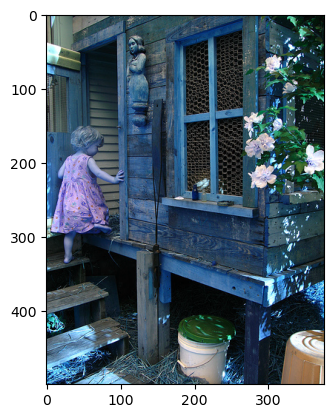

0    A child in a pink dress is climbing up a set o...
1                A girl going into a wooden building .
2     A little girl climbing into a wooden playhouse .
3    A little girl climbing the stairs to her playh...
4    A little girl in a pink dress going into a woo...
Name: caption, dtype: object


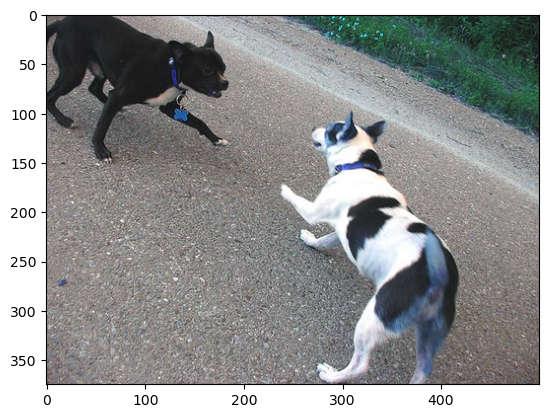

5           A black dog and a spotted dog are fighting
6    A black dog and a tri-colored dog playing with...
7    A black dog and a white dog with brown spots a...
8    Two dogs of different breeds looking at each o...
9      Two dogs on pavement moving toward each other .
Name: caption, dtype: object


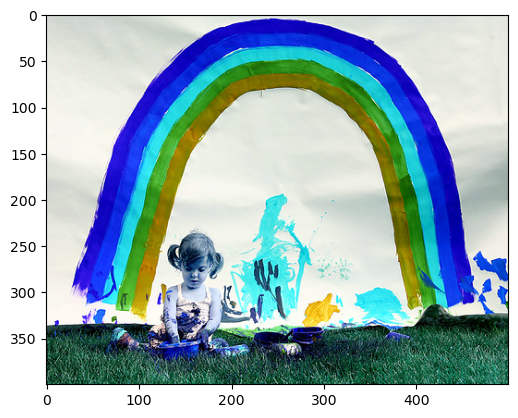

10    A little girl covered in paint sits in front o...
11    A little girl is sitting in front of a large p...
12    A small girl in the grass plays with fingerpai...
13    There is a girl with pigtails sitting in front...
14    Young girl with pigtails painting outside in t...
Name: caption, dtype: object


In [13]:
count = 0
for i in img_total.groups.keys():
    img = cv2.imread(r"C:\Users\prave\OneDrive\Desktop\Image_Captioning\Images\{}".format(i))
    plt.imshow(img)
    plt.show()
    print(img_total.get_group(i)['caption'])
    count+=1
    
    if count == 3:
        break

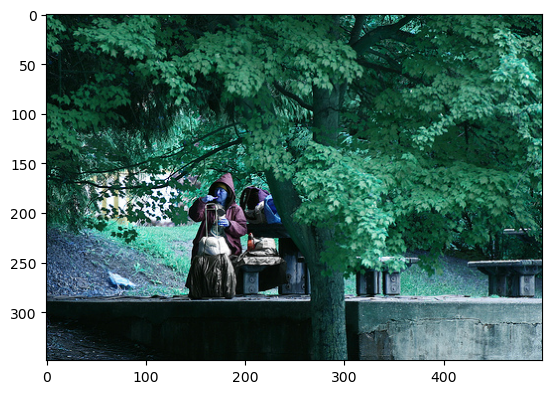

In [14]:
img = cv2.imread(r"C:\Users\prave\OneDrive\Desktop\Image_Captioning\Images\1197800988_7fb0ca4888.jpg")

plt.imshow(img);

In [15]:
caption_df[['caption']].head(3)

,caption
0,A child in a pink dress is climbing up a set o...
1,A girl going into a wooden building .
2,A little girl climbing into a wooden playhouse .


# 3 -- Text Pre-Processing

> Not to do

    - Pos tagging 
    - Stemming and lemmatization (running & runner --> run) # It's drawback
    - Don't Remove Stopwords
    - Don't Remove any spaces
> TO Do

    - lower case
    - Remove Special characters
    - If len(word)<1 we can remove like A

### Mapping function --> Applymap

> Lower case

In [16]:
caption_df_copy = caption_df.copy() 

In [17]:
caption_df_copy['caption'] = caption_df_copy[['caption']].applymap(lambda x : x.lower())

In [18]:
caption_df_copy.head(3)

,image,caption
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .


> Removing Special Characters

In [19]:
caption_df_copy['caption'] = caption_df_copy[['caption']].applymap(lambda x : re.sub('[^a-z ]','',x))

In [20]:
caption_df_copy.head(3)

,image,caption
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse


>  If len(word)<1 we can remove like A

In [21]:
# Function for removing less than 1 length

def remaining(caption):
    caption_words = caption.split()
    remain_words = []
    for word in caption_words:
        if len(word)>1:
            remain_words.append(word)
    new_words = ' '.join(remain_words)
    
    return new_words

In [22]:
# checking function

remaining('It is a beautiful weather A coffee should be a good.') # a is removed

'It is beautiful weather coffee should be good.'

In [23]:
caption_df_copy['caption'] = caption_df_copy[['caption']].applymap(remaining)

In [24]:
caption_df_copy.head(3)

,image,caption
0,1000268201_693b08cb0e.jpg,child in pink dress is climbing up set of stai...
1,1000268201_693b08cb0e.jpg,girl going into wooden building
2,1000268201_693b08cb0e.jpg,little girl climbing into wooden playhouse


# Image Pre-Processing

# One to Many

- Sentences should have previous words to predict next words.
- Issue : given image generate text it has to know start and ending word to stop the sequence 
    - Probability of calculating conditional probability it will be calculated accurately with correct distribution
    
    - Sol: We will add a word at start (like start_sequence) and Ending (like ending_sequence)

In [25]:
caption_df_copy['caption'] = caption_df_copy[['caption']].applymap(lambda x : 'startsequence '+ x + ' endingsequence')

# Any word we can add but it should not present in the corpus

In [26]:
caption_df_copy.head(3)

,image,caption
0,1000268201_693b08cb0e.jpg,startsequence child in pink dress is climbing ...
1,1000268201_693b08cb0e.jpg,startsequence girl going into wooden building ...
2,1000268201_693b08cb0e.jpg,startsequence little girl climbing into wooden...


## CNN - For Images to extract features (vectors)

> We will use transfer learning from pre-trained model (VGG_19)

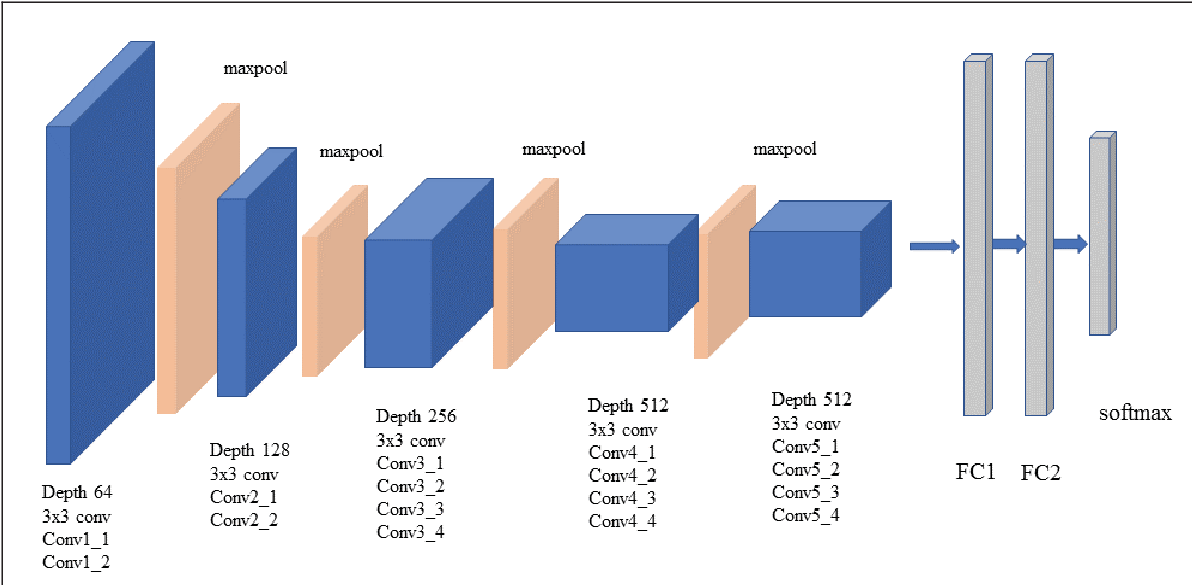

In [27]:
import keras
from keras.applications import VGG19
from keras.models import Sequential

> We will remove FC1 and FC2 (fully connected) and softmax

> We have to extract only features not classification

In [28]:
from keras import Model

In [29]:
pre_VGG = VGG19(weights='imagenet',input_shape= (224,224,3)) # trained weights from image net

# why we are using if we don't do it will give architecture only

In [30]:
pre_VGG.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [31]:
pre_VGG.layers # It is a list we will use indexing

In [32]:
pre_VGG.layers[-4]

In [33]:
pre_VGG.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [34]:
req_VGG = Model(pre_VGG.input,pre_VGG.layers[-4].output)

In [35]:
req_VGG.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [36]:
img = cv2.imread(r"C:\Users\prave\OneDrive\Desktop\Image_Captioning\Images\12830823_87d2654e31.jpg")
img = cv2.resize(img,(224,224))

In [37]:
img = img.reshape(1,224,224,3)
img.shape

(1, 224, 224, 3)

In [38]:
output = req_VGG.predict(img)

1/1 [==============================] - 1s 1s/step


In [39]:
output.shape

(1, 25088)

In [40]:
output = output.reshape(-1)

In [41]:
output.shape

(25088,)

In [42]:
caption_df_copy[['image']]

,image
0,1000268201_693b08cb0e.jpg
1,1000268201_693b08cb0e.jpg
2,1000268201_693b08cb0e.jpg
3,1000268201_693b08cb0e.jpg
4,1000268201_693b08cb0e.jpg
...,...
40450,997722733_0cb5439472.jpg
40451,997722733_0cb5439472.jpg
40452,997722733_0cb5439472.jpg
40453,997722733_0cb5439472.jpg


In [43]:
caption_df_copy['image'].nunique()

8091

In [47]:
final_images = {}
for i in caption_df_copy['image'].unique():
    img = cv2.imread(r"C:\Users\prave\OneDrive\Desktop\Image_Captioning\Images\{}".format(i))
    img = cv2.resize(img,(224,224))
    img = img/255.0                                         # -->  Normalization
    img = img.reshape(1,224,224,3)
    output_img = req_VGG.predict(img)
    final = output_img.reshape(-1)
    final_images.update({i:final})

1/1 [==============================] - 0s 373ms/step


1/1 [==============================] - 0s 446ms/step


1/1 [==============================] - 0s 461ms/step


1/1 [==============================] - 0s 481ms/step


1/1 [==============================] - 0s 455ms/step


1/1 [==============================] - 0s 461ms/step


1/1 [==============================] - 1s 605ms/step


1/1 [==============================] - 0s 380ms/step


1/1 [==============================] - 0s 446ms/step


1/1 [==============================] - 0s 436ms/step


1/1 [==============================] - 0s 382ms/step


1/1 [==============================] - 1s 509ms/step


1/1 [==============================] - 1s 520ms/step


1/1 [==============================] - 0s 400ms/step


1/1 [==============================] - 0s 470ms/step


1/1 [==============================] - 0s 477ms/step


1/1 [==============================] - 0s 420ms/step


1/1 [==============================] - 0s 481ms/step


1/1 [==============================] - 0s 497ms/step


1/1 [==============================] - 1s 512ms/step


1/1 [==============================] - 1s 545ms/step


1/1 [==============================] - 1s 577ms/step


1/1 [==============================] - 0s 446ms/step


1/1 [==============================] - 1s 501ms/step


1/1 [==============================] - 0s 468ms/step


1/1 [==============================] - 0s 458ms/step


1/1 [==============================] - 1s 649ms/step


In [48]:
final_images

{'1000268201_693b08cb0e.jpg': array([0.32388934, 0.        , 0.        , ..., 0.        , 0.8663496 ,
        0.        ], dtype=float32),
 '1001773457_577c3a7d70.jpg': array([0.599326  , 0.        , 0.76665795, ..., 0.        , 0.83312434,
        0.        ], dtype=float32),
 '1002674143_1b742ab4b8.jpg': array([0.        , 0.        , 0.        , ..., 0.        , 0.77040845,
        0.        ], dtype=float32),
 '1003163366_44323f5815.jpg': array([0.       , 0.       , 0.       , ..., 0.       , 0.8770172,
        0.       ], dtype=float32),
 '1007129816_e794419615.jpg': array([0.07032865, 0.        , 0.        , ..., 0.        , 1.3051603 ,
        0.        ], dtype=float32),
 '1007320043_627395c3d8.jpg': array([1.0541126, 0.       , 0.       , ..., 0.       , 1.37265  ,
        0.       ], dtype=float32),
 '1009434119_febe49276a.jpg': array([0.254908 , 0.       , 0.       , ..., 0.       , 1.0100597,
        0.       ], dtype=float32),
 '1012212859_01547e3f17.jpg': array([0.457269

In [49]:
len(final_images)

8091

In [47]:
import pickle

In [ ]:
with open(r"C:\Users\prave\OneDrive\Desktop\Image_Captioning\feature.pkl","wb") as t:
    pickle.dump(final_images,t)

In [48]:
final_pickle = open(r"C:\Users\prave\OneDrive\Desktop\Image_Captioning\feature.pkl",'rb')
model_pickle = pickle.load(final_pickle)

EOFError: Ran out of input

In [53]:
len(model_pickle)

8091

# Preparing DataSet

> When dealing with Text data 

    - we have to identify vocabulary size
        - unique words
    - Highest & lowest length of word
        - Padding
        

In [54]:
split_words = set()
for i in caption_df_copy['caption'].values:
    split_words.update(i.split())

In [55]:
len(split_words) # Vocab_size ----> Count = Total - 2 (Start_seq,Ending_seq)

8767

In [56]:
caption_df_copy[['caption']].applymap(lambda x : x.split())

,caption
0,"[startsequence, child, in, pink, dress, is, cl..."
1,"[startsequence, girl, going, into, wooden, bui..."
2,"[startsequence, little, girl, climbing, into, ..."
3,"[startsequence, little, girl, climbing, the, s..."
4,"[startsequence, little, girl, in, pink, dress,..."
...,...
40450,"[startsequence, man, in, pink, shirt, climbs, ..."
40451,"[startsequence, man, is, rock, climbing, high,..."
40452,"[startsequence, person, in, red, shirt, climbi..."
40453,"[startsequence, rock, climber, in, red, shirt,..."


In [57]:
caption_df_copy[['caption']].applymap(lambda x : len(x.split()))

,caption
0,16
1,7
2,8
3,10
4,11
...,...
40450,9
40451,10
40452,14
40453,7


In [58]:
caption_df_copy[['caption']].applymap(lambda x : len(x.split())).max()

caption    34
dtype: int64

In [59]:
caption_df_copy[['caption']].applymap(lambda x : len(x.split())).min()

caption    2
dtype: int64

In [61]:
word_index = {}
for key,word in enumerate(split_words,start = 1): # In padding it will give Zero so we have to start from 1
    word_index.update({word:key})

In [63]:
sent = caption_df_copy[['caption']].iloc[0].values[0].split()
sent

['startsequence',
 'child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way',
 'endingsequence']

In [64]:
img_vect = model_pickle[caption_df_copy[['image']].iloc[0].values[0]]
img_vect

array([0.32388934, 0.        , 0.        , ..., 0.        , 0.8663496 ,
       0.        ], dtype=float32)

In [70]:
from keras.utils import pad_sequences
from keras.utils import to_categorical

In [71]:
image_vector = []
text_vector  = []
final_label = []

for index in range(0,2500): # first 500 images
    sentence = caption_df_copy[['caption']].iloc[index].values[0].split()
    for word in range(1,len(sentence)):
        image_vector.append(model_pickle[caption_df_copy[['image']].iloc[index].values[0]])
        
        feature1 = sentence[0:word]
        feature2 = sentence[word]
        
        l = []
        for i in feature1:
            l.append(word_index[i])
        text_vector.append(pad_sequences([l],maxlen=34,padding = 'post')[0])
        label = word_index[feature2]
        final_label.append(to_categorical([label],num_classes=8768)[0])

In [72]:
len(image_vector)

26085

In [73]:
text_vector[0:10]

[array([1419,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]),
 array([1419, 6922,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]),
 array([1419, 6922, 6227,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]),
 array([1419, 6922, 6227, 4329,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0]),
 array([1419, 6922, 6227, 4329, 7683,    0,    0

In [74]:
final_label

[array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0.,

In [75]:
[[np.array(image_vector),np.array(text_vector)],np.array(final_label)]

[[array([[0.32388934, 0.        , 0.        , ..., 0.        , 0.8663496 ,
          0.        ],
         [0.32388934, 0.        , 0.        , ..., 0.        , 0.8663496 ,
          0.        ],
         [0.32388934, 0.        , 0.        , ..., 0.        , 0.8663496 ,
          0.        ],
         ...,
         [0.3221156 , 0.        , 0.0476    , ..., 0.        , 1.0195518 ,
          0.        ],
         [0.3221156 , 0.        , 0.0476    , ..., 0.        , 1.0195518 ,
          0.        ],
         [0.3221156 , 0.        , 0.0476    , ..., 0.        , 1.0195518 ,
          0.        ]], dtype=float32),
  array([[1419,    0,    0, ...,    0,    0,    0],
         [1419, 6922,    0, ...,    0,    0,    0],
         [1419, 6922, 6227, ...,    0,    0,    0],
         ...,
         [1419, 3731, 4011, ...,    0,    0,    0],
         [1419, 3731, 4011, ...,    0,    0,    0],
         [1419, 3731, 4011, ...,    0,    0,    0]])],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 

In [76]:
import keras
from keras.layers import Dense,Embedding,LSTM,add,Input
from keras import Model

### Text

In [77]:
input_1 = Input(shape=(34,)) # max_vocab_size

output_1 = Embedding(input_dim=8767+1,output_dim=40)(input_1) # length vocab_size

output_2 = LSTM(256)(output_1)

### Image

In [78]:
input_1_1  = Input(shape=(25088,))
output_3 = Dense(256,activation="relu")(input_1_1)

In [79]:
output_4 = add([output_3,output_2])
final_output = Dense(8768,activation="softmax")(output_4)

In [80]:
model = Model(inputs=[input_1_1,input_1],outputs=[final_output])

In [81]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 25088)]      0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 40)       350720      ['input_2[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 256)          6422784     ['input_3[0][0]']                
                                                                                            

In [82]:
model.compile(loss="categorical_crossentropy",optimizer="adam")

In [1]:
model.fit([np.array(image_vector),np.array(text_vector)],np.array(final_label))

NameError: name 'model' is not defined

In [ ]:
np.array(image_vector).shape

In [ ]:
np.array(text_vector).shape

In [ ]:
np.array(final_label).shape